In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')
import pandas as pd
import random

In [3]:
df = pd.read_csv('data.csv')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head(20)

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,label
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [151]:
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 4:[]} #2 & 4 is output data
test_set = {2:[], 4:[]}  #2 is for the benign tumors   4 is for malignant tumors,

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]


In [152]:
for i in train_data:  
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [153]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    #print(distances)
    #print(sorted(distances))
    #print(sorted(distances)[:k])
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes))
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result   # 2,4

In [154]:
def accuracy_check(n):
    correct = 0
    total=0
    for group in test_set:
        for data in test_set[group]:
            vote = k_nearest_neighbors(train_set, data, k=n)
            if group == vote: 
                correct += 1
            total += 1
    return correct/total

In [155]:
y=[]
x=[]
for i in range(1,200,2):
    x.append(i)
    y.append(accuracy_check(i))
    

/home/mihir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: K is set to a value less than total voting groups!
  This is separate from the ipykernel package so we can avoid doing imports until


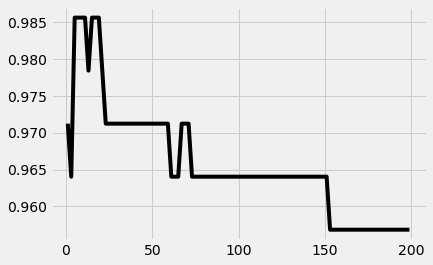

In [156]:
plt.plot(x,y,color='#000000')
plt.show()